# MODELOS AR E MA

Importando as bibliotecas necessárias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss


# Identificação de um Processo Autorregressivo

-   Série estacionária: teste de hipótese
-   Olhar para a FAC e FACP para identificar a ordem:
    -   A FAC decai de forma amortizada para zero.
    -   A FACP é zero a partir do lag p (teria uma quebra a partir de p), então até p é significativo.

## Processo AR(2) 

### Simulação do Processo AR(2)

In [2]:
# Função para plotar ACF e PACF
def plot_acf_pacf(series, lags=10, title=''):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].plot(series)
    axes[0].set_title(f'Série Temporal - {title}')
    sm.graphics.tsa.plot_acf(series, lags=lags, ax=axes[1])
    sm.graphics.tsa.plot_pacf(series, lags=lags, ax=axes[2])
    plt.tight_layout()
    plt.show()


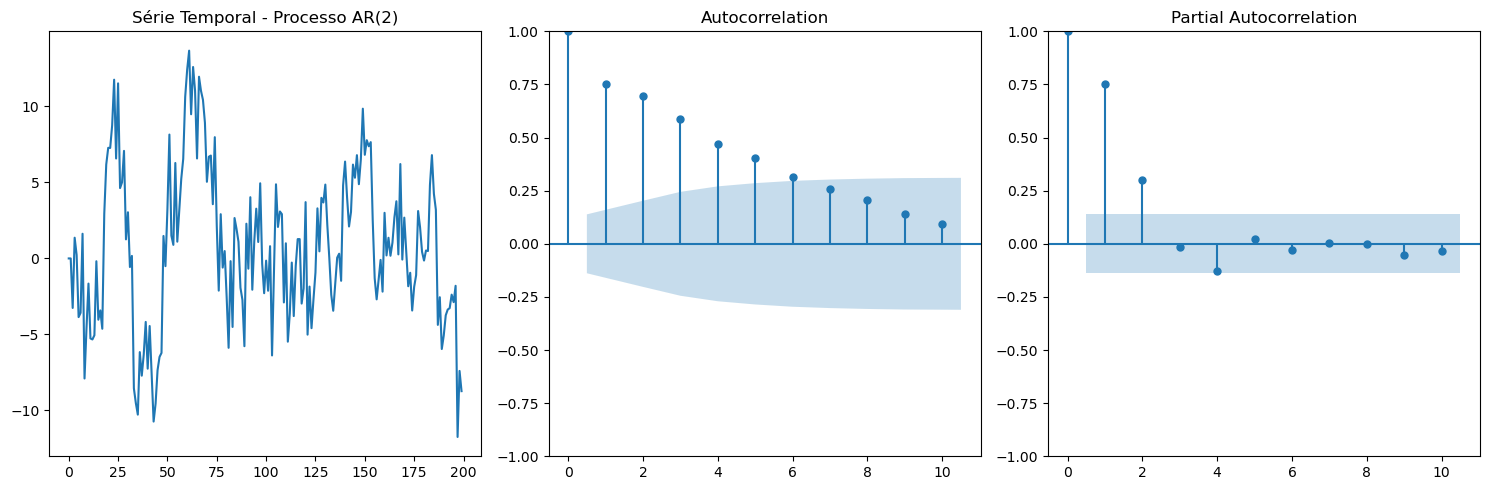

In [3]:
# Simulação do Processo AR(2)
np.random.seed(123)
n = 200
X = np.zeros(n)
for i in range(2, n):
    X[i] = 0.5 * X[i-1] + 0.4 * X[i-2] + np.random.normal(0, 3)
plot_acf_pacf(X, title='Processo AR(2)')


### Teste de Estacionaridade

### Teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin)
 - ***Hipótese Nula (H0):*** A série é estacionária.
 - **Hipótese Alternativa (Ha):*** A série não é estacionária.

In [4]:
kpss_stat, p_value, lags, critical_values = kpss(X)
print('Teste KPSS:')
print(f'Estatística do teste: {kpss_stat:.4f}')
print(f'p-valor: {p_value:.4f}')
print('Valores Críticos:')
for key, value in critical_values.items():
    print(f'{key}: {value:.4f}')
print('Resultado:')
if p_value > 0.05:
    print("Falha ao rejeitar a hipótese nula (H0): Os dados são estacionários.")
else:
    print("Rejeitar a hipótese nula (H0): Os dados não são estacionários.")


Teste KPSS:
Estatística do teste: 0.0794
p-valor: 0.1000
Valores Críticos:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390
Resultado:
Falha ao rejeitar a hipótese nula (H0): Os dados são estacionários.


C:\Users\anail\AppData\Local\Temp\ipykernel_19252\2325637275.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, p_value, lags, critical_values = kpss(X)


### Teste ADF (Dickey-Fuller)
 - ***Hipótese Nula (H0):*** A série não é estacionária.
 - **Hipótese Alternativa (Ha):*** A série é estacionária.

In [5]:
adf_result = adfuller(X)
print('\nTeste ADF:')
print(f'Estatística do teste: {adf_result[0]:.4f}')
print(f'p-valor: {adf_result[1]:.4f}')
print('Valores Críticos:')
for key, value in adf_result[4].items():
    print(f'{key}: {value:.4f}')
print('Resultado:')
if adf_result[1] <= 0.05:
    print("Rejeitar a hipótese nula (H0): Os dados são estacionários.")
else:
    print("Falha ao rejeitar a hipótese nula (H0): Os dados não são estacionários.")




Teste ADF:
Estatística do teste: -3.4945
p-valor: 0.0081
Valores Críticos:
1%: -3.4642
5%: -2.8764
10%: -2.5747
Resultado:
Rejeitar a hipótese nula (H0): Os dados são estacionários.


## Simulação do Processo AR(3)

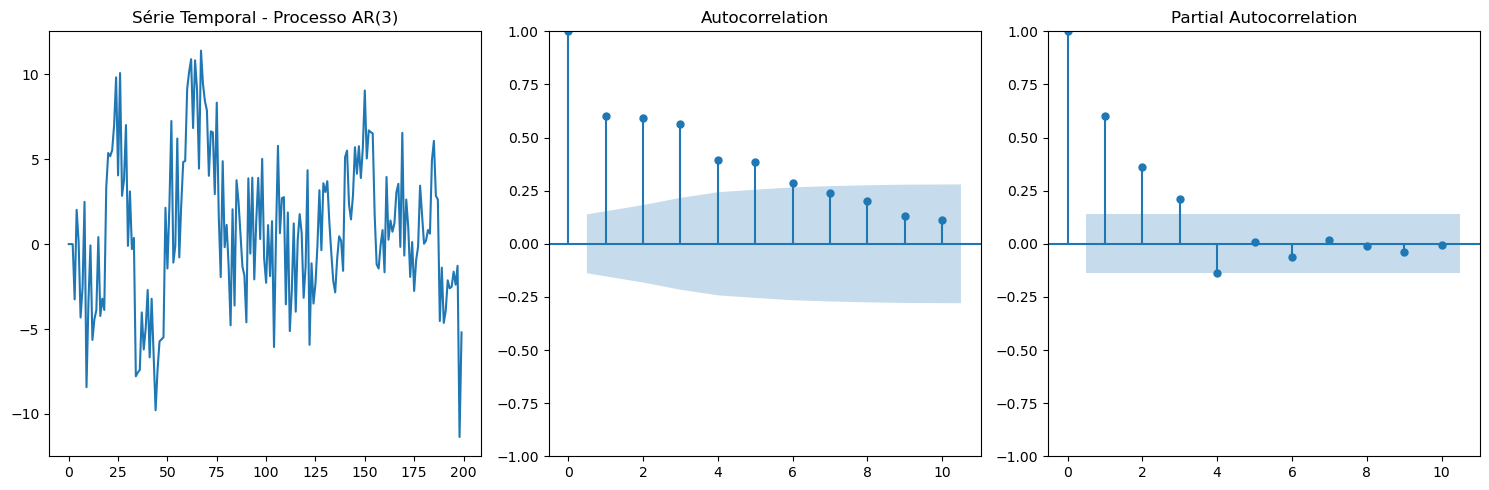

In [6]:

np.random.seed(123)
n = 200
X = np.zeros(n)
for i in range(3, n):
    X[i] = 0.3 * X[i-1] + 0.4 * X[i-2] + 0.2 * X[i-3] + np.random.normal(0, 3)
plot_acf_pacf(X, title='Processo AR(3)')



### Teste de Estacionaridade

### Teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin)
 - ***Hipótese Nula (H0):*** A série é estacionária.
 - **Hipótese Alternativa (Ha):*** A série não é estacionária.

In [7]:
# Teste KPSS e ADF para Processo AR(3)
kpss_stat, p_value, lags, critical_values = kpss(X)
print('Teste KPSS:')
print(f'Estatística do teste: {kpss_stat:.4f}')
print(f'p-valor: {p_value:.4f}')
print('Valores Críticos:')
for key, value in critical_values.items():
    print(f'{key}: {value:.4f}')
print('Resultado:')
if p_value > 0.05:
    print("Falha ao rejeitar a hipótese nula (H0): Os dados são estacionários.")
else:
    print("Rejeitar a hipótese nula (H0): Os dados não são estacionários.")



Teste KPSS:
Estatística do teste: 0.0848
p-valor: 0.1000
Valores Críticos:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390
Resultado:
Falha ao rejeitar a hipótese nula (H0): Os dados são estacionários.


C:\Users\anail\AppData\Local\Temp\ipykernel_19252\856633969.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, p_value, lags, critical_values = kpss(X)


### Teste ADF (Dickey-Fuller)
 - ***Hipótese Nula (H0):*** A série não é estacionária.
 - **Hipótese Alternativa (Ha):*** A série é estacionária.

In [8]:
adf_result = adfuller(X)
print('\nTeste ADF:')
print(f'Estatística do teste: {adf_result[0]:.4f}')
print(f'p-valor: {adf_result[1]:.4f}')
print('Valores Críticos:')
for key, value in adf_result[4].items():
    print(f'{key}: {value:.4f}')
print('Resultado:')
if adf_result[1] <= 0.05:
    print("Rejeitar a hipótese nula (H0): Os dados são estacionários.")
else:
    print("Falha ao rejeitar a hipótese nula (H0): Os dados não são estacionários.")




Teste ADF:
Estatística do teste: -3.3027
p-valor: 0.0148
Valores Críticos:
1%: -3.4642
5%: -2.8764
10%: -2.5747
Resultado:
Rejeitar a hipótese nula (H0): Os dados são estacionários.


## Simulação do Processo MA(1)

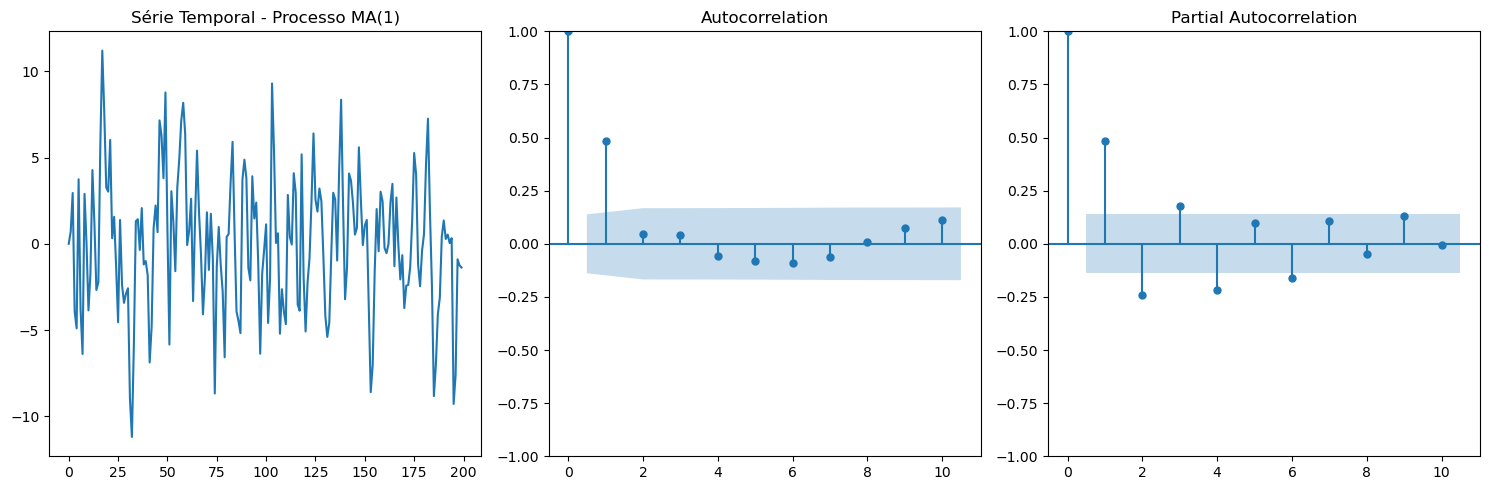

In [9]:

np.random.seed(123)
n = 200
E = np.random.normal(0, 3, n)
X = np.zeros(n)
for i in range(1, n):
    X[i] = E[i] + 0.7 * E[i-1]
plot_acf_pacf(X, title='Processo MA(1)')



### Teste de Estacionaridade

### Teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin)
 - ***Hipótese Nula (H0):*** A série é estacionária.
 - ***Hipótese Alternativa (Ha):*** A série não é estacionária.

In [10]:

# Teste KPSS e ADF para Processo MA(1)
kpss_stat, p_value, lags, critical_values = kpss(X)
print('Teste KPSS:')
print(f'Estatística do teste: {kpss_stat:.4f}')
print(f'p-valor: {p_value:.4f}')
print('Valores Críticos:')
for key, value in critical_values.items():
    print(f'{key}: {value:.4f}')
print('Resultado:')
if p_value > 0.05:
    print("Falha ao rejeitar a hipótese nula (H0): Os dados são estacionários.")
else:
    print("Rejeitar a hipótese nula (H0): Os dados não são estacionários.")


Teste KPSS:
Estatística do teste: 0.0856
p-valor: 0.1000
Valores Críticos:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390
Resultado:
Falha ao rejeitar a hipótese nula (H0): Os dados são estacionários.


C:\Users\anail\AppData\Local\Temp\ipykernel_19252\3610894964.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, p_value, lags, critical_values = kpss(X)


### Teste ADF (Dickey-Fuller)
 - ***Hipótese Nula (H0):*** A série não é estacionária.
 - **Hipótese Alternativa (Ha):*** A série é estacionária.

In [11]:
adf_result = adfuller(X)
print('\nTeste ADF:')
print(f'Estatística do teste: {adf_result[0]:.4f}')
print(f'p-valor: {adf_result[1]:.4f}')
print('Valores Críticos:')
for key, value in adf_result[4].items():
    print(f'{key}: {value:.4f}')
print('Resultado:')
if adf_result[1] <= 0.05:
    print("Rejeitar a hipótese nula (H0): Os dados são estacionários.")
else:
    print("Falha ao rejeitar a hipótese nula (H0): Os dados não são estacionários.")



Teste ADF:
Estatística do teste: -6.1292
p-valor: 0.0000
Valores Críticos:
1%: -3.4645
5%: -2.8766
10%: -2.5748
Resultado:
Rejeitar a hipótese nula (H0): Os dados são estacionários.


## Simulação do Processo MA(1) 

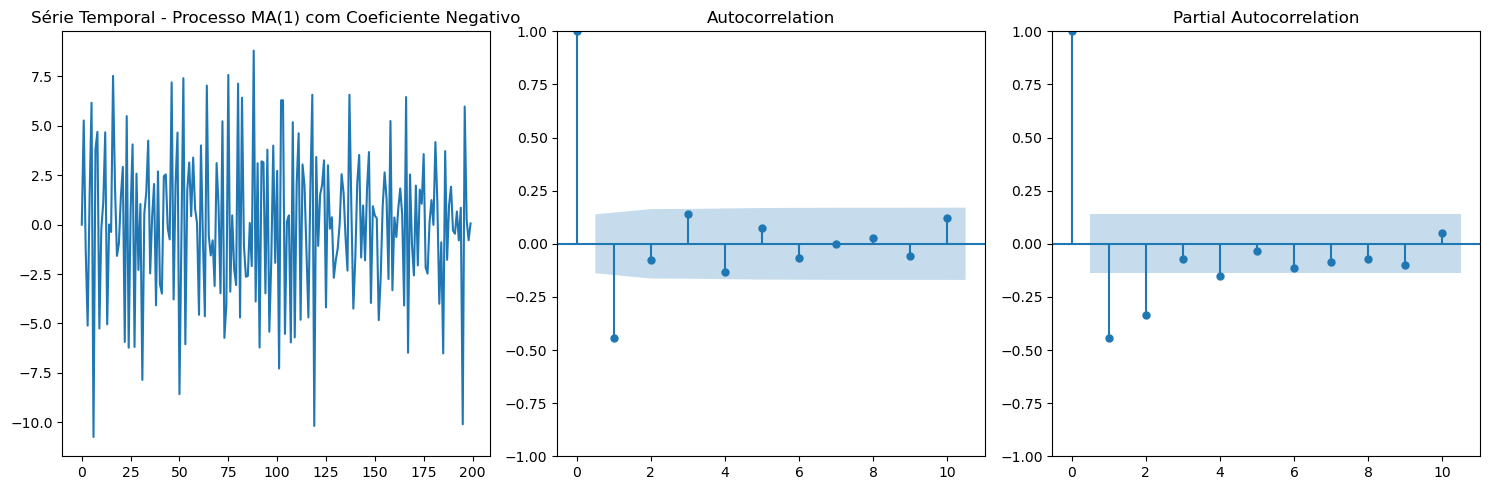

In [12]:
np.random.seed(123)
n = 200
E = np.random.normal(0, 3, n)
X = np.zeros(n)
for i in range(1, n):
    X[i] = E[i] - 0.7 * E[i-1]
plot_acf_pacf(X, title='Processo MA(1) com Coeficiente Negativo')


### Teste de Estacionaridade

### Teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin)
 - ***Hipótese Nula (H0):*** A série é estacionária.
 - **Hipótese Alternativa (Ha):*** A série não é estacionária.

In [13]:
kpss_stat, p_value, lags, critical_values = kpss(X)
print('Teste KPSS:')
print(f'Estatística do teste: {kpss_stat:.4f}')
print(f'p-valor: {p_value:.4f}')
print('Valores Críticos:')
for key, value in critical_values.items():
    print(f'{key}: {value:.4f}')
print('Resultado:')
if p_value > 0.05:
    print("Falha ao rejeitar a hipótese nula (H0): Os dados são estacionários.")
else:
    print("Rejeitar a hipótese nula (H0): Os dados não são estacionários.")


Teste KPSS:
Estatística do teste: 0.0651
p-valor: 0.1000
Valores Críticos:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390
Resultado:
Falha ao rejeitar a hipótese nula (H0): Os dados são estacionários.


C:\Users\anail\AppData\Local\Temp\ipykernel_19252\2325637275.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, p_value, lags, critical_values = kpss(X)


### Teste ADF (Dickey-Fuller)
 - ***Hipótese Nula (H0):*** A série não é estacionária.
 - **Hipótese Alternativa (Ha):*** A série é estacionária.

In [14]:

adf_result = adfuller(X)
print('\nTeste ADF:')
print(f'Estatística do teste: {adf_result[0]:.4f}')
print(f'p-valor: {adf_result[1]:.4f}')
print('Valores Críticos:')
for key, value in adf_result[4].items():
    print(f'{key}: {value:.4f}')
print('Resultado:')
if adf_result[1] <= 0.05:
    print("Rejeitar a hipótese nula (H0): Os dados são estacionários.")
else:
    print("Falha ao rejeitar a hipótese nula (H0): Os dados não são estacionários.")




Teste ADF:
Estatística do teste: -10.2063
p-valor: 0.0000
Valores Críticos:
1%: -3.4642
5%: -2.8764
10%: -2.5747
Resultado:
Rejeitar a hipótese nula (H0): Os dados são estacionários.


## Simulação do Processo MA(2)

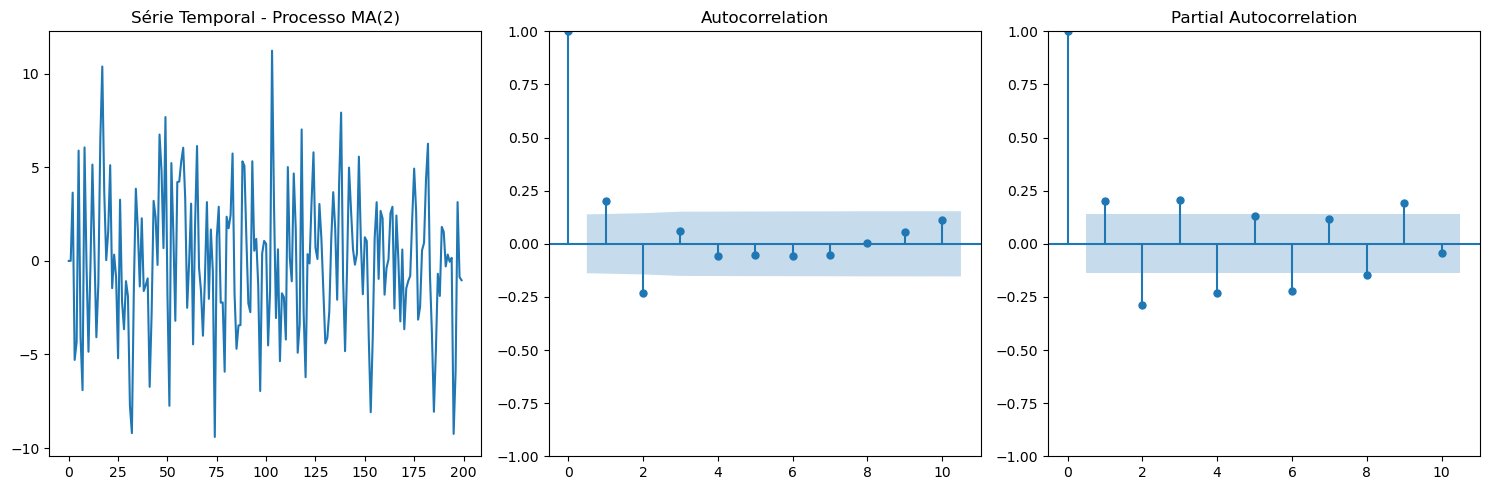

In [15]:
np.random.seed(123)
n = 200
E = np.random.normal(0, 3, n)
X = np.zeros(n)
for i in range(2, n):
    X[i] = E[i] + 0.5 * E[i-1] - 0.4 * E[i-2]
plot_acf_pacf(X, title='Processo MA(2)')

### Teste de Estacionaridade

### Teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin)
 - ***Hipótese Nula (H0):*** A série é estacionária.
 - **Hipótese Alternativa (Ha):*** A série não é estacionária.

In [ ]:
kpss_stat, p_value, lags, critical_values = kpss(X)
print('Teste KPSS:')
print(f'Estatística do teste: {kpss_stat:.4f}')
print(f'p-valor: {p_value:.4f}')
print('Valores Críticos:')
for key, value in critical_values.items():
    print(f'{key}: {value:.4f}')
print('Resultado:')
if p_value > 0.05:
    print("Falha ao rejeitar a hipótese nula (H0): Os dados são estacionários.")
else:
    print("Rejeitar a hipótese nula (H0): Os dados não são estacionários.")



### Teste ADF (Dickey-Fuller)
 - ***Hipótese Nula (H0):*** A série não é estacionária.
 - **Hipótese Alternativa (Ha):*** A série é estacionária.

In [ ]:
adf_result = adfuller(X)
print('\nTeste ADF:')
print(f'Estatística do teste: {adf_result[0]:.4f}')
print(f'p-valor: {adf_result[1]:.4f}')
print('Valores Críticos:')
for key, value in adf_result[4].items():
    print(f'{key}: {value:.4f}')
print('Resultado:')
if adf_result[1] <= 0.05:
    print("Rejeitar a hipótese nula (H0): Os dados são estacionários.")
else:
    print("Falha ao rejeitar a hipótese nula (H0): Os dados não são estacionários.")